In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Trader,Asset Name,Status,Trade Type,Payout,Investment,Trader Profit,Trading Strike,Close Strike,Trading Time,Close Time
0,trader C,AUD/USD,Closed,Put,1.85,1000,-1000.000,0.69676,0.69724,2020-06-10 03:00:01.760,2020-06-10 03:05:00.000
1,trader C,EUR/JPY,Closed,Call,1.85,10000,8500.000,116.35500,116.36400,2020-04-27 02:30:01.370,2020-04-27 02:35:00.000
2,trader C,EUR/USD,Closed,Call,1.85,5000,-5000.000,1.09412,1.09378,2020-04-15 07:45:01.810,2020-04-15 07:50:00.000
3,trader C,EUR/JPY,Closed,Call,1.95,1000,950.000,119.69900,119.71600,2019-09-13 18:57:25.390,2019-09-13 18:58:25.390
4,trader C,EUR/USD,Closed,Put,1.85,1000,-1000.000,1.21202,1.21202,2020-12-03 02:55:00.520,2020-12-03 03:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...
3394,trader C,AUD/USD,Closed,Call,1.85,1000,-1000.000,0.76130,0.76091,2021-04-04 23:00:58.950,2021-04-04 23:05:58.950
3395,trader C,EUR/USD,Closed,Call,1.88,20000,17600.000,1.12285,1.12358,2020-03-06 05:59:58.740,2020-03-06 06:05:00.000
3396,trader C,NZD/JPY,Closed,Put,1.90,1000,-1000.000,63.70600,63.71300,2020-04-02 01:28:05.140,2020-04-02 01:31:05.140
3397,trader A,BITCOIN,Sold,Call,2.05,3435,2662.041,32669.30000,32829.60000,2021-06-21 06:37:12.820,2021-06-21 06:38:10.123


In [4]:
#sns.lineplot(x=, y=, data = df)
#plt.show()

In [5]:
dfa = df[df['Trader'] == 'trader A']
dfb = df[df['Trader'] == 'trader B'] 
dfc = df[df['Trader'] == 'trader C']
dfe = df[df['Trader'] == 'trader E']

In [6]:
df = df.drop(['Trader','Asset Name', 'Trading Time', 'Close Time'], axis=1)

In [7]:
df['Status'].replace(['Closed', 'Sold'], [0,1], inplace=True)
df['Trade Type'].replace(['Call', 'Put'], [0,1], inplace=True)

In [8]:
df

,Status,Trade Type,Payout,Investment,Trader Profit,Trading Strike,Close Strike
0,0,1,1.85,1000,-1000.000,0.69676,0.69724
1,0,0,1.85,10000,8500.000,116.35500,116.36400
2,0,0,1.85,5000,-5000.000,1.09412,1.09378
3,0,0,1.95,1000,950.000,119.69900,119.71600
4,0,1,1.85,1000,-1000.000,1.21202,1.21202
...,...,...,...,...,...,...,...
3394,0,0,1.85,1000,-1000.000,0.76130,0.76091
3395,0,0,1.88,20000,17600.000,1.12285,1.12358
3396,0,1,1.90,1000,-1000.000,63.70600,63.71300
3397,1,0,2.05,3435,2662.041,32669.30000,32829.60000


In [9]:
invest_raw_a = dfa['Investment'].values
invest_raw_b = dfb['Investment'].values
invest_raw_c = dfc['Investment'].values
invest_raw_e = dfe['Investment'].values

In [10]:
invest_raw_a = invest_raw_a.reshape(-1, 1)
invest_raw_a = invest_raw_a.astype('float64')

invest_raw_b = invest_raw_b.reshape(-1, 1)
invest_raw_b = invest_raw_b.astype('float64')

invest_raw_c = invest_raw_c.reshape(-1, 1)
invest_raw_c = invest_raw_c.astype('float64')

invest_raw_e = invest_raw_e.reshape(-1, 1)
invest_raw_e = invest_raw_e.astype('float64')

In [11]:
from scipy import cluster
from scipy.cluster.vq import kmeans

In [12]:
centroids_a, avg_distance_a = kmeans(invest_raw_a, 2)
centroids_b, avg_distance_b = kmeans(invest_raw_b, 2)
centroids_c, avg_distance_c = kmeans(invest_raw_c, 2)
centroids_e, avg_distance_e = kmeans(invest_raw_e, 2)

In [13]:
groups_a, cdist_a = cluster.vq.vq(invest_raw_a, centroids_a)
groups_b, cdist_b = cluster.vq.vq(invest_raw_b, centroids_b)
groups_c, cdist_c = cluster.vq.vq(invest_raw_c, centroids_c)
groups_e, cdist_e = cluster.vq.vq(invest_raw_e, centroids_e)

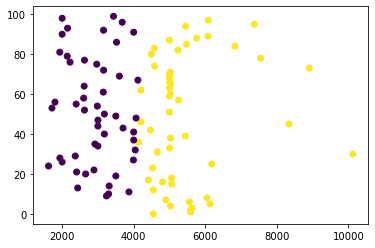

In [14]:
plt.scatter(invest_raw_a, np.arange(0,len(invest_raw_a)), c=groups_a)
#plt.scatter(invest_raw_b, np.arange(0,len(invest_raw_b)), c=groups_b)
#plt.scatter(invest_raw_c, np.arange(0,len(invest_raw_c)), c=groups_c)
#plt.scatter(invest_raw_e, np.arange(0,len(invest_raw_e)), c=groups_e)

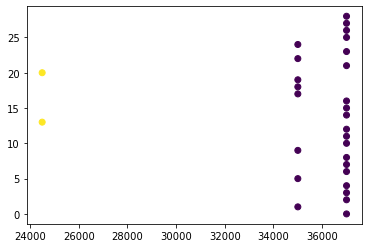

In [15]:
plt.scatter(invest_raw_b, np.arange(0,len(invest_raw_b)), c=groups_b)

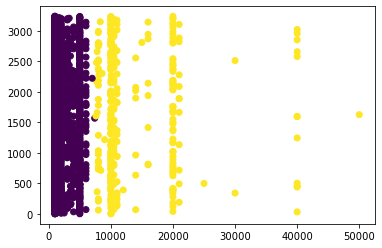

In [16]:
plt.scatter(invest_raw_c, np.arange(0,len(invest_raw_c)), c=groups_c)

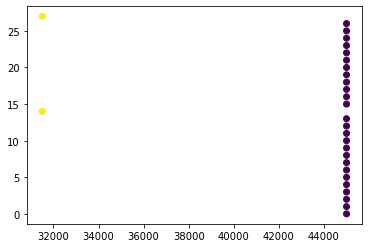

In [17]:
plt.scatter(invest_raw_e, np.arange(0,len(invest_raw_e)), c=groups_e)

In [18]:
# sns.heatmap(df.corr(), annot=True)